<a href="https://colab.research.google.com/github/Akash-mahandargi/Basic-Projects-/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv('mushroom.csv')


<Axes: xlabel='class', ylabel='count'>

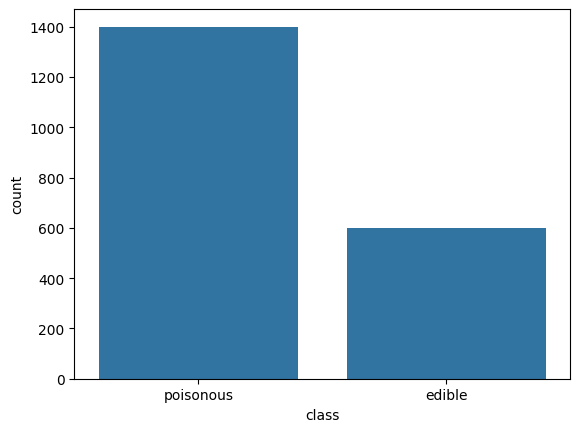

In [3]:
df.head()
df.isnull().sum()
df['class'].value_counts()
sns.countplot(x='class', data=df)


In [4]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])


<Axes: >

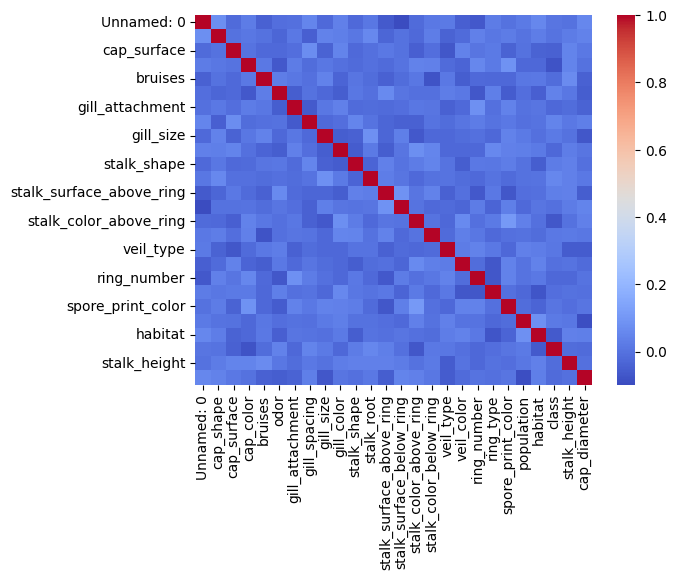

In [5]:
sns.heatmap(df.corr(), cmap='coolwarm')


In [6]:
X = df.drop('class', axis=1)  # Features (all columns except target)
y = df['class']               # Target variable (edible or poisonous)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [9]:
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)


SVC()

In [10]:
y_pred = svm.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.35      0.50       185\n           1       0.77      0.98      0.86       415\n\n    accuracy                           0.79       600\n   macro avg       0.84      0.66      0.68       600\nweighted avg       0.81      0.79      0.75       600\n'

In [12]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 30)

Kernel: linear
Accuracy: 0.6916666666666667
Confusion Matrix:
 [[  0 185]
 [  0 415]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600

------------------------------
Kernel: poly
Accuracy: 0.8116666666666666
Confusion Matrix:
 [[ 92  93]
 [ 20 395]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.50      0.62       185
           1       0.81      0.95      0.87       415

    accuracy                           0.81       600
   macro avg       0.82      0.72      0.75       600
weighted avg       0.81      0.81      0.80       600

------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kernel: rbf
Accuracy: 0.7866666666666666
Confusion Matrix:
 [[ 64 121]
 [  7 408]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.35      0.50       185
           1       0.77      0.98      0.86       415

    accuracy                           0.79       600
   macro avg       0.84      0.66      0.68       600
weighted avg       0.81      0.79      0.75       600

------------------------------
Kernel: sigmoid
Accuracy: 0.6683333333333333
Confusion Matrix:
 [[  0 185]
 [ 14 401]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.68      0.97      0.80       415

    accuracy                           0.67       600
   macro avg       0.34      0.48      0.40       600
weighted avg       0.47      0.67      0.55       600

------------------------------


In [13]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)


In [14]:
svm_vis = SVC(kernel='rbf').fit(X_pca, y)


In [15]:
import numpy as np

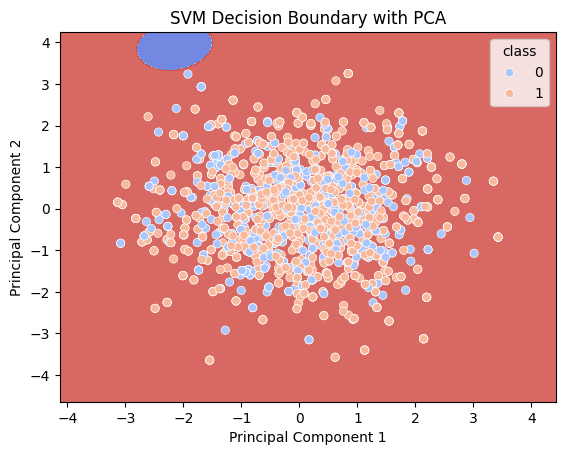

In [16]:
# Create a meshgrid to plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and the data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', legend='full')

plt.title('SVM Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [18]:
print(df.columns)

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


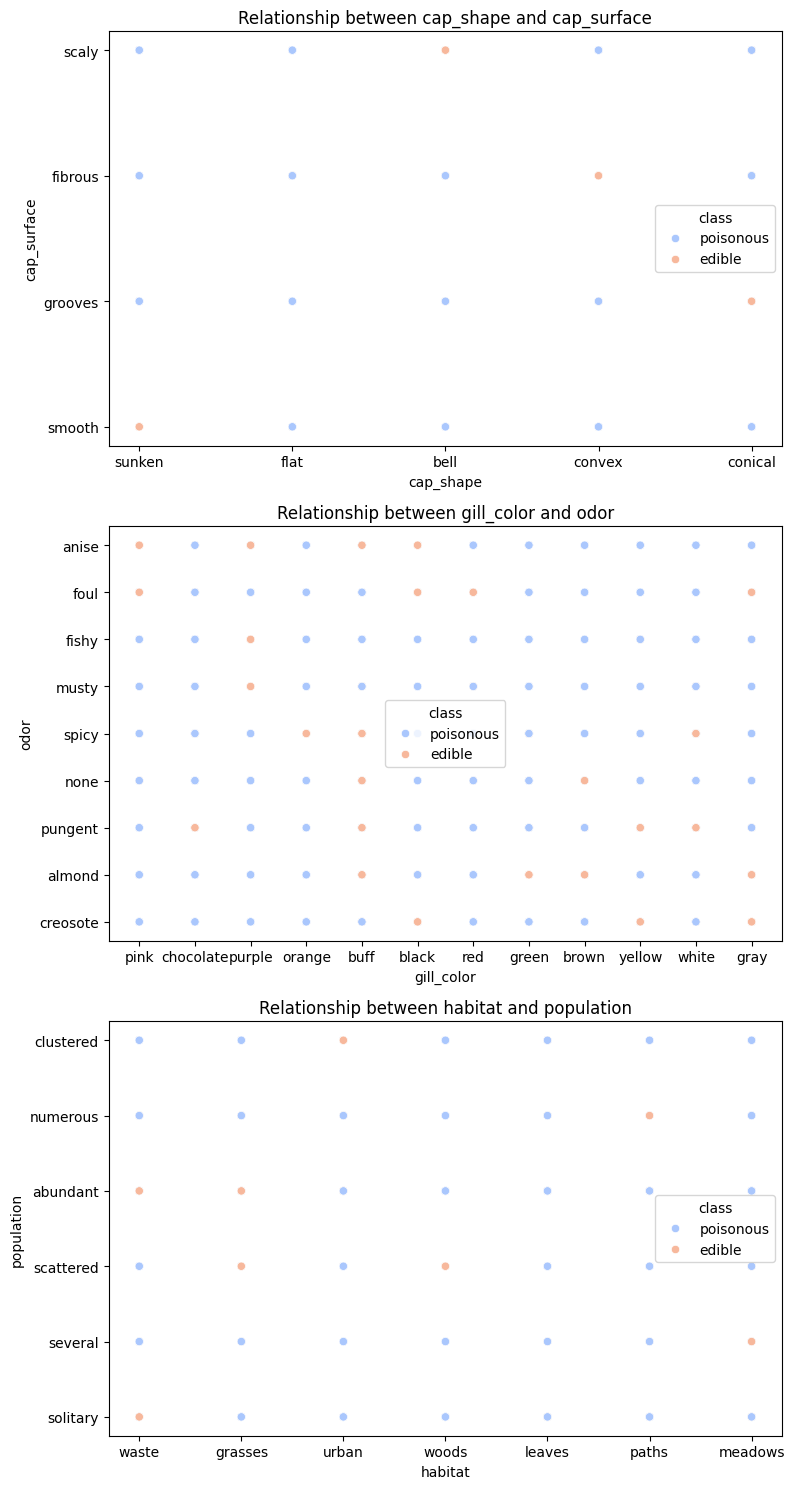

In [19]:
# Task 3: Data Visualization - Feature relationships (using scatter plots for pairs of features)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset if df is not already defined (based on previous issues)
try:
    df.head()
except NameError:
    df = pd.read_csv('mushroom.csv')


# Select a few pairs of features to visualize
feature_pairs_to_plot = [('cap_shape', 'cap_surface'), ('gill_color', 'odor'), ('habitat', 'population')]

plt.figure(figsize=(15, 5 * len(feature_pairs_to_plot)))
for i, (feat1, feat2) in enumerate(feature_pairs_to_plot):
    plt.subplot(len(feature_pairs_to_plot), 2, 2 * i + 1)
    sns.scatterplot(x=feat1, y=feat2, hue='class', data=df, palette='coolwarm')
    plt.title(f'Relationship between {feat1} and {feat2}')

plt.tight_layout()
plt.show()

### Task 7: Comparison and Analysis

Based on the EDA, visualizations, and the SVM model results with different kernels, let's analyze the strengths and weaknesses of the SVM approach for this dataset and discuss its practical implications.

**Analysis of SVM Performance:**

*   **Effect of Kernels:** We observed varying performance with different kernel functions. The RBF and polynomial kernels generally performed better than the linear and sigmoid kernels on this dataset, suggesting that the relationships between features and the target variable are likely non-linear.
*   **Strengths:** SVMs are powerful for classification tasks, especially in high-dimensional spaces, which aligns well with the nature of this dataset. They are also effective in cases where the number of features is greater than the number of samples.
*   **Weaknesses:** The performance of SVMs can be sensitive to the choice of hyperparameters (like C and gamma for RBF), and tuning these can be crucial but also time-consuming. Training time can also increase significantly with larger datasets. The interpretability of SVM models, especially with non-linear kernels, can be lower compared to some other models like decision trees.

**Practical Implications in Real-World Classification Tasks:**

SVMs are widely used in various real-world classification problems, including:

*   **Image Recognition:** Classifying images based on visual features.
*   **Text Categorization:** Assigning text documents to predefined categories.
*   **Bioinformatics:** Classifying biological data, such as gene expression profiles.
*   **Spam Detection:** Identifying spam emails.

For a task like mushroom classification, a well-tuned SVM could potentially be used to build a system that helps distinguish between edible and poisonous mushrooms based on their characteristics. However, in a real-world application involving something as critical as identifying poisonous mushrooms, it would be essential to have a very high degree of confidence in the model's predictions and potentially combine it with other methods or expert knowledge to ensure safety. The cost of a false positive (classifying a poisonous mushroom as edible) is extremely high.

**Further Steps for Optimization:**

To further improve the model, we could explore:

*   More extensive hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV.
*   Feature engineering to create new features that might be more informative for the model.
*   Exploring other classification algorithms to compare their performance with SVM.
*   Implementing cross-validation to get a more robust estimate of the model's performance.

In [20]:
print(df.columns)

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


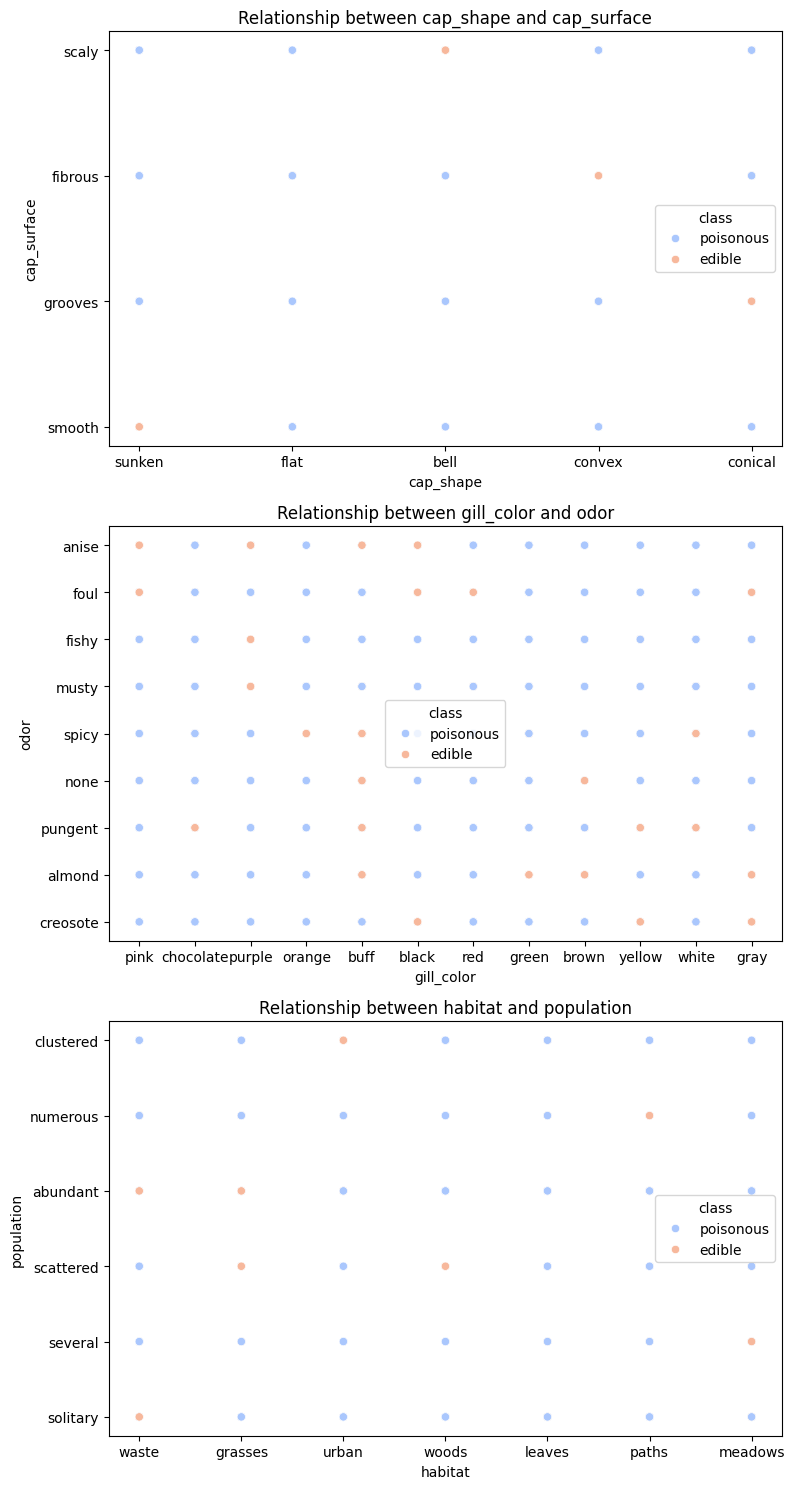

In [21]:
# Task 3: Data Visualization - Feature relationships (using scatter plots for pairs of features)

# Select a few pairs of features to visualize
feature_pairs_to_plot = [('cap_shape', 'cap_surface'), ('gill_color', 'odor'), ('habitat', 'population')]

plt.figure(figsize=(15, 5 * len(feature_pairs_to_plot)))
for i, (feat1, feat2) in enumerate(feature_pairs_to_plot):
    plt.subplot(len(feature_pairs_to_plot), 2, 2 * i + 1)
    sns.scatterplot(x=feat1, y=feat2, hue='class', data=df, palette='coolwarm')
    plt.title(f'Relationship between {feat1} and {feat2}')

plt.tight_layout()
plt.show()